## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image
from src.optimization.optimizers import NormalizedOptimizer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device=device)

In [4]:
img_size = 224
size = (3, img_size, img_size)

transforms = [ClampingMinMax(0, 1)]
parametrization_transforms = [NormalizationMeanStd()]
denormalization_transforms = [DenormalizationMeanStd()]
gradient_transforms = [tfs.GaussianBlur(7, 2)]
to_tensor = tfs.Compose([tfs.Resize(size=(img_size, img_size)),tfs.ToTensor()])


In [5]:
loss_agg_fn = AggregationFn(metric="similarity").to(device)

In [6]:
def vis(ptypes, name, lr_scheduler_cls=None, lr_scheduler_kwargs={}, robustness_transforms=[]):
    input_image = Image.open(f"data/train_cropped/{name}")
    display(input_image)
    input_tensor = to_tensor(input_image)
    #input_tensor = torch.rand(input_tensor.shape)
    image = visualize_prototypes_octaves(model, 
                             ptypes,
                            num_octaves=1,
                            optimization_steps=200, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            gradient_transforms=gradient_transforms,
                            optimizer_kwargs={"lr": 0.02},
                            lr_scheduler_cls=lr_scheduler_cls,
                            lr_scheduler_kwargs=lr_scheduler_kwargs,
                            lr_scheduler_step_interval=10,
                            print_interval=200,
                            display_interval=200)
    pilimg = tfs.ToPILImage()(image)
    display(pilimg)
    return pilimg

In [7]:
from torch.optim.lr_scheduler import MultiplicativeLR, SequentialLR
lr_scheduler_cls = MultiplicativeLR
lr_scheduler_kwargs = {"lr_lambda": lambda itr: 1.2 if itr < 10 else 0.95}

## Prototypes with LR scheduler

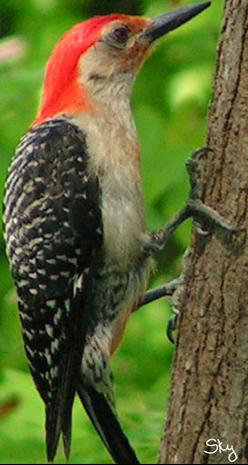

step: 0/200, loss: 5.270331382751465, lr: 0.02


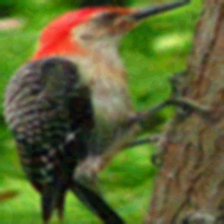

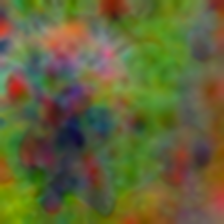

/home/z1134376/miniconda3/envs/StyleFlow/lib/python3.7/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


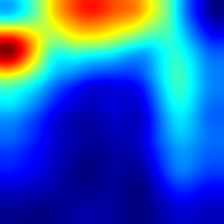

In [8]:
image_name = "189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg"
out_image = vis([(188,1)],image_name, lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),])
heatmap(model, out_image, 188, 1, superimpose=False)

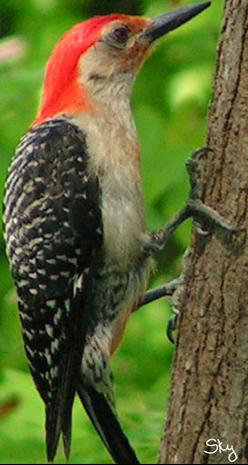

step: 0/200, loss: 6.76115083694458, lr: 0.02


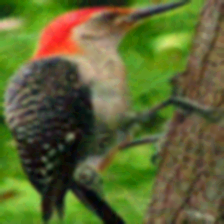

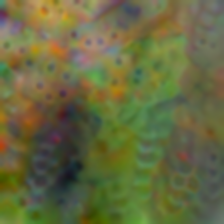

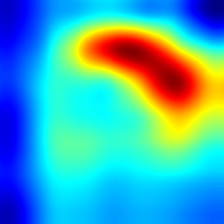

In [9]:
out_image = vis([(188,0)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),])
heatmap(model, out_image, 188, 0, superimpose=False)

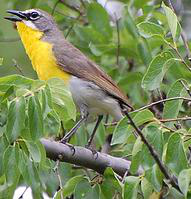

step: 0/200, loss: 34.28704071044922, lr: 0.02


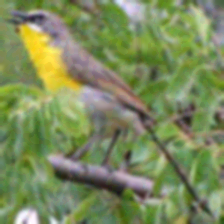

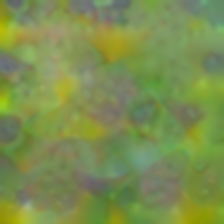

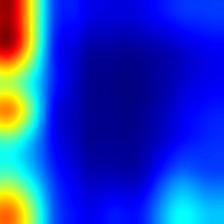

In [10]:
image_name = "020.Yellow_breasted_Chat/Yellow_Breasted_Chat_0005_21828.jpg"
out_image = vis([(19,0)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),])
heatmap(model, out_image, 19, 0, superimpose=False)

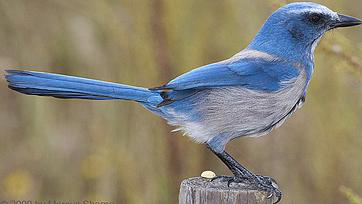

step: 0/200, loss: 2.883175849914551, lr: 0.02


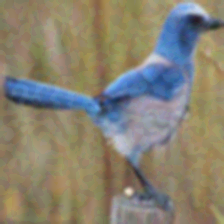

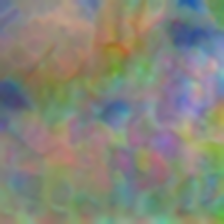

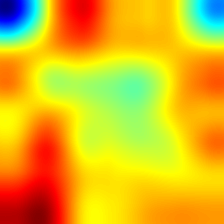

In [11]:
image_name = "074.Florida_Jay/Florida_Jay_0002_64476.jpg"
out_image =  vis([(73,2)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),])
heatmap(model, out_image, 73, 2, superimpose=False)

## Random 90 rotation

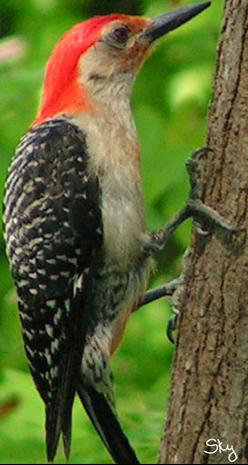

step: 0/200, loss: 5.270331382751465, lr: 0.02


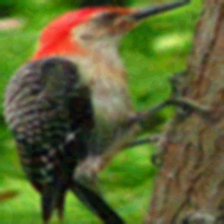

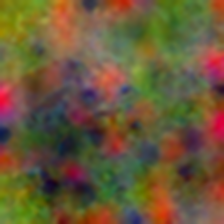

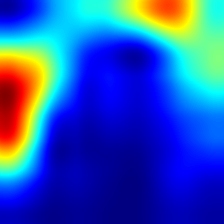

In [12]:
image_name = "189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg"
out_image = vis([(188,1)],image_name, lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),ReversibleRandomRotate90(p=0.5)])
heatmap(model, out_image, 188, 1, superimpose=False)

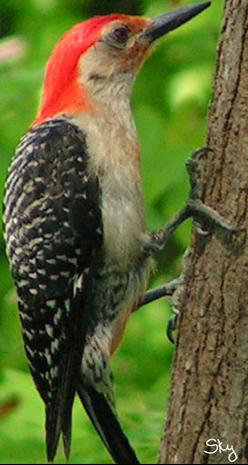

step: 0/200, loss: 6.76115083694458, lr: 0.02


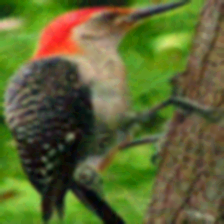

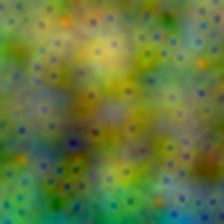

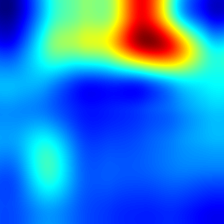

In [13]:
out_image = vis([(188,0)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),ReversibleRandomRotate90(p=0.5)])
heatmap(model, out_image, 188, 0, superimpose=False)

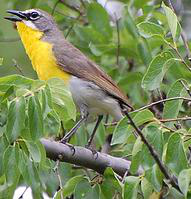

step: 0/200, loss: 34.42818832397461, lr: 0.02


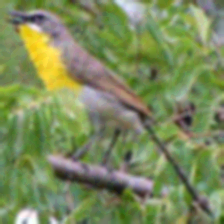

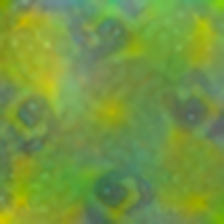

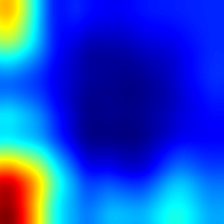

In [14]:
image_name = "020.Yellow_breasted_Chat/Yellow_Breasted_Chat_0005_21828.jpg"
out_image = vis([(19,0)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),ReversibleRandomRotate90(p=0.5)])
heatmap(model, out_image, 19, 0, superimpose=False)

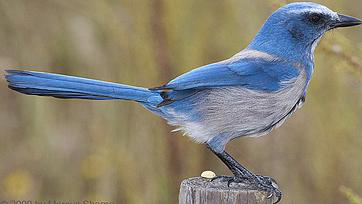

step: 0/200, loss: 2.883175849914551, lr: 0.02


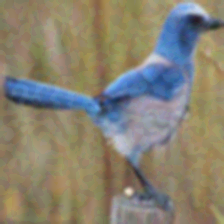

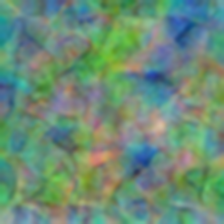

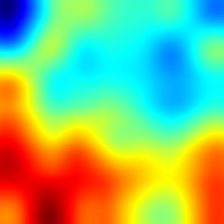

In [15]:
image_name = "074.Florida_Jay/Florida_Jay_0002_64476.jpg"
out_image =  vis([(73,2)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),ReversibleRandomRotate90(p=0.5)])
heatmap(model, out_image, 73, 2, superimpose=False)

## Random horizontal flip

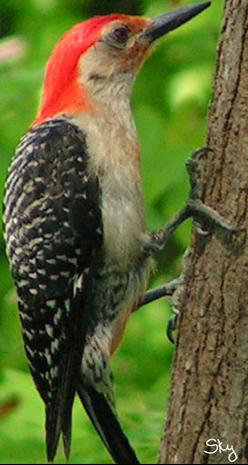

step: 0/200, loss: 5.270331382751465, lr: 0.02


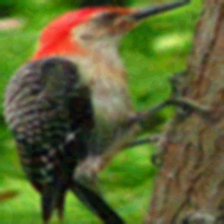

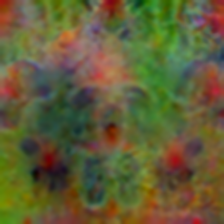

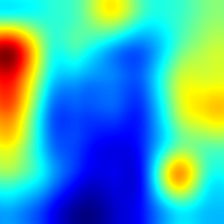

In [16]:
image_name = "189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg"
out_image = vis([(188,1)],image_name, lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),ReversibleRandomHorizontalFlip(p=0.5)])
heatmap(model, out_image, 188, 1, superimpose=False)

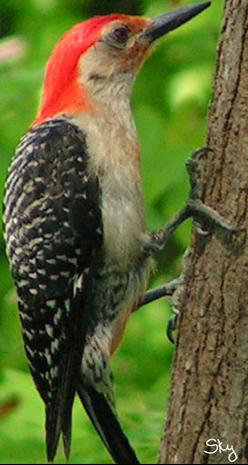

step: 0/200, loss: 6.76115083694458, lr: 0.02


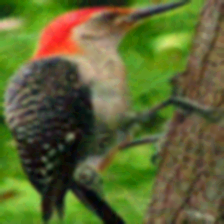

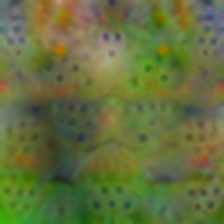

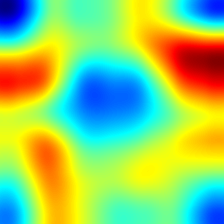

In [17]:
out_image = vis([(188,0)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),ReversibleRandomHorizontalFlip(p=0.5)])
heatmap(model, out_image, 188, 0, superimpose=False)

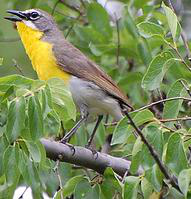

step: 0/200, loss: 33.21744918823242, lr: 0.02


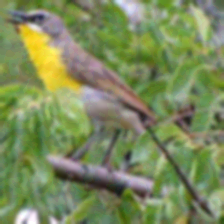

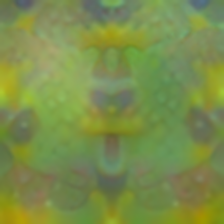

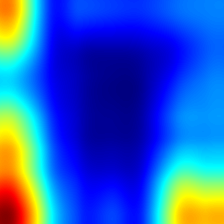

In [18]:
image_name = "020.Yellow_breasted_Chat/Yellow_Breasted_Chat_0005_21828.jpg"
out_image = vis([(19,0)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),ReversibleRandomHorizontalFlip(p=0.5)])
heatmap(model, out_image, 19, 0, superimpose=False)

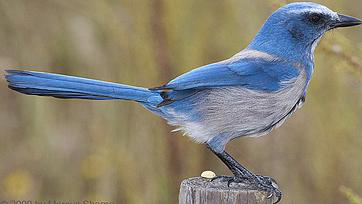

step: 0/200, loss: 2.6342577934265137, lr: 0.02


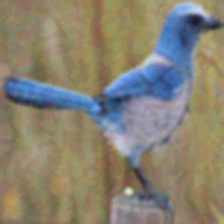

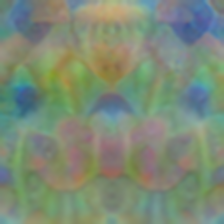

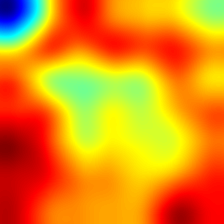

In [19]:
image_name = "074.Florida_Jay/Florida_Jay_0002_64476.jpg"
out_image =  vis([(73,2)],image_name,lr_scheduler_cls, lr_scheduler_kwargs, [tfs.GaussianBlur(7, 2),ReversibleRandomHorizontalFlip(p=0.5)])
heatmap(model, out_image, 73, 2, superimpose=False)